<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminary-EDA" data-toc-modified-id="Preliminary-EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminary EDA</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Joining-dataframes" data-toc-modified-id="Joining-dataframes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Joining dataframes</a></span></li><li><span><a href="#Preping-dataset" data-toc-modified-id="Preping-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preping dataset</a></span></li></ul></div>

In [10]:
from __future__ import division
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np
import seaborn as sns
from math import sqrt
%matplotlib inline

In [11]:
# Load the data (will take a short while)
calendar = pd.read_csv("airbnb_data/calendar.csv")
demographics = pd.read_csv("airbnb_data/demographics.csv")
econ_state = pd.read_csv("airbnb_data/econ_state.csv")
listings = pd.read_csv("airbnb_data/listings.csv")
real_estate = pd.read_csv("airbnb_data/real_estate.csv")
venues = pd.read_csv("airbnb_data/venues.csv")

In [12]:
dataset_names = ["calendar", "demographics", "econ_state", "listings", "real_estate", "venues"]
datasets = [calendar, demographics, econ_state, listings, real_estate, venues]

## Preliminary EDA

In [6]:
for i in range(len(datasets)):
    print(dataset_names[i])
    print(datasets[i].keys())
    print()

calendar
Index(['listing_id', 'date', 'available', 'price', 'metro_area'], dtype='object')

demographics
Index(['zipcode', '5_years_or_less', '5-9_years', '10-14_years', '15-19_years',
       '20-24_years', '25-34_years', '35-44_years', '45-54_years',
       '55-59_years', '60-64_years', '65-74_years', '75-84_years',
       '85_years_or_more', 'households', '$9,999_or_less', '$10,000-$14,999',
       '$15,000-$24,999', '$25,000-$34,999', '$35,000-$49,999',
       '$50,000-$64,999', '$65,000-$74,999', '$75,000-$99,999',
       '$100,000_or_more', 'median_household_income', 'mean_household_income'],
      dtype='object')

econ_state
Index(['state', '2005Q1_gdp', '2005Q2_gdp', '2005Q3_gdp', '2005Q4_gdp',
       '2006Q1_gdp', '2006Q2_gdp', '2006Q3_gdp', '2006Q4_gdp', '2007Q1_gdp',
       ...
       '2016/03_ur', '2016/04_ur', '2016/05_ur', '2016/06_ur', '2016/07_ur',
       '2016/08_ur', '2016/09_ur', '2016/10_ur', '2016/11_ur', '2016/12_ur'],
      dtype='object', length=519)

listings
In

In [23]:
demographics[demographics["zipcode"] // 1000 == 10]

,zipcode,5_years_or_less,5-9_years,10-14_years,15-19_years,20-24_years,25-34_years,35-44_years,45-54_years,55-59_years,...,"$10,000-$14,999","$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$64,999","$65,000-$74,999","$75,000-$99,999","$100,000_or_more",median_household_income,mean_household_income
2558,10001,23537,562,1089,900,1053,2785,4970,3905,2795,...,8.6,4.1,9.3,5.1,9.2,8.5,9.8,27.5,86801,158183
2559,10002,80736,3079,3171,3638,3922,5338,13938,12055,11182,...,15.5,12.6,14,8.8,10,14.2,7.1,31.3,33726,61946
2560,10003,57112,1545,911,764,7308,5714,15565,7843,5718,...,6.1,1.9,7,4.9,6.4,13,11.3,30.7,98151,161692
2561,10004,3221,126,101,161,227,255,857,572,387,...,2.2,0.3,1.7,6.5,5.1,7.1,14.8,27,119691,177262
2562,10005,8131,299,250,140,85,1101,3690,1696,631,...,7.9,0.8,4.5,1.9,1.4,9,9.9,20.3,124194,176424
2563,10006,3110,267,47,25,24,354,1455,557,234,...,6.9,5.2,0,0.7,3.2,15.7,6.6,25.5,123691,162688
2564,10007,6876,342,483,229,287,241,1777,1628,940,...,2.9,1.4,0.6,0.7,3.8,5.9,5.3,15,"250,000+",441278
2565,10009,60865,1491,1838,1604,2220,6338,15577,7390,8248,...,12.7,7.7,9.6,7.2,8.4,12.3,11.2,31.9,59090,85207
2566,10010,31447,1014,611,588,1411,4081,8332,4648,3936,...,7.8,3.9,4.9,4,5.5,13.2,9.4,28.1,101718,154979
2567,10011,52349,1982,1676,1185,1046,2500,13532,9643,6481,...,5.3,2.9,5.7,4.8,7.7,9.6,8.4,25.7,109818,196817


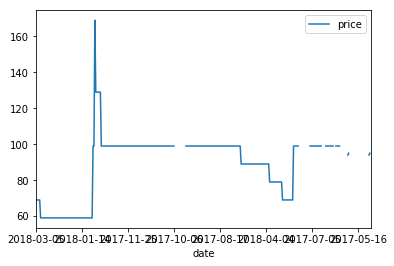

In [42]:
calendar.loc[calendar["listing_id"] == 2515].plot(x="date", y="price")

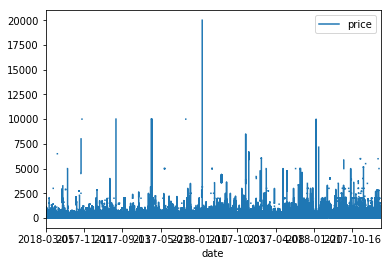

In [41]:
calendar.plot(x="date", y="price")
plt.show()

## Data Cleaning

In [16]:
calendar = calendar.set_index("listing_id")

In [17]:
listings = listings.set_index("id")

In [78]:
calendar[(calendar["listing_id"] == 7949480) & (calendar["price"].notna())]

,listing_id,date,available,price,metro_area
5678469,7949480,2017-10-29,t,99.0,NYC
5678470,7949480,2017-10-28,t,107.0,NYC
5678471,7949480,2017-10-27,t,107.0,NYC
5678472,7949480,2017-10-26,t,99.0,NYC
5678473,7949480,2017-10-25,t,99.0,NYC
5678474,7949480,2017-10-24,t,99.0,NYC
5678475,7949480,2017-10-23,t,99.0,NYC
5678476,7949480,2017-10-22,t,99.0,NYC
5678477,7949480,2017-10-21,t,107.0,NYC
5678478,7949480,2017-10-20,t,107.0,NYC


In [20]:
calendar_new = calendar.rename({"price": "listed price"}, axis='columns')
listings_new = listings.rename({"price": "original price"}, axis = 'columns')

## Joining dataframes

In [21]:
df = calendar_new.join(listings_new)

In [22]:
calendar_new.shape

(21841235, 4)

In [23]:
listings_new.shape

(59824, 28)

In [24]:
df.shape

(21841235, 32)

In [25]:
del(calendar)
del(listings)

## Preping dataset

In [26]:
#Getting list of column headers
features_list = df.columns.tolist()
print(features_list)

['date', 'available', 'listed price', 'metro_area', 'accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability', 'host_id', 'instant_bookable', 'latitude', 'longitude', 'metropolitan', 'name', 'original price', 'property_type', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value', 'room_type', 'state', 'weekly_price', 'zipcode']


In [27]:
len(features_list)

32

In [28]:
df.dtypes

date                            object
available                       object
listed price                   float64
metro_area                      object
accommodates                   float64
amenities                       object
availability_30                float64
bathrooms                      float64
bed_type                        object
bedrooms                       float64
beds                           float64
cancellation_policy             object
city                            object
has_availability               float64
host_id                        float64
instant_bookable                object
latitude                       float64
longitude                      float64
metropolitan                    object
name                            object
original price                 float64
property_type                   object
review_scores_checkin          float64
review_scores_cleanliness      float64
review_scores_communication    float64
review_scores_location   

In [ ]:
# df.nunique

In [34]:
df.reset_index(level=0, inplace=True)

In [39]:
df = df.rename({"index": "listing_id"}, axis = 'columns')

MemoryError: 

In [ ]:
df.head()

In [33]:
df["zipcode"].head()

590    80207.0
590    80207.0
590    80207.0
590    80207.0
590    80207.0
Name: zipcode, dtype: object

In [ ]:
#List of different types of features
# id_list = ['']
target_list = ['available',]
flag_list = ['adm__datetime', 'dis_datetime'] #'available',
num_list = [col for col in df.columns if df[col].nunique()>4 and col not in id_list and col not in flag_list]
cat_list = [col for col in df.columns if df[col].nunique()<=4 and col not in target_list and col not in flag_list]
for x in (id_list + target_list + flag_list):
    features_list.remove(x)
features_list